# Data Analysis Interview Challenge

## Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 


### Load the data

In [52]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib.pyplot as plt
import datetime
import calendar
from pandas import json_normalize
from datetime import timedelta
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

In [53]:
# read the logins file
with open('data/logins.json') as f:
  data = json.load(f)

In [54]:
# convert to a DataFrame
logins = pd.DataFrame(pd.to_datetime(data['login_time']),columns=['login_time'])

In [55]:
# round time to nearest quarter hour
logins['qtr_hr']=logins['login_time'].dt.round('15min')  

In [56]:
# isolate just the time portion of the date
logins['time_only']=logins['qtr_hr'].dt.time

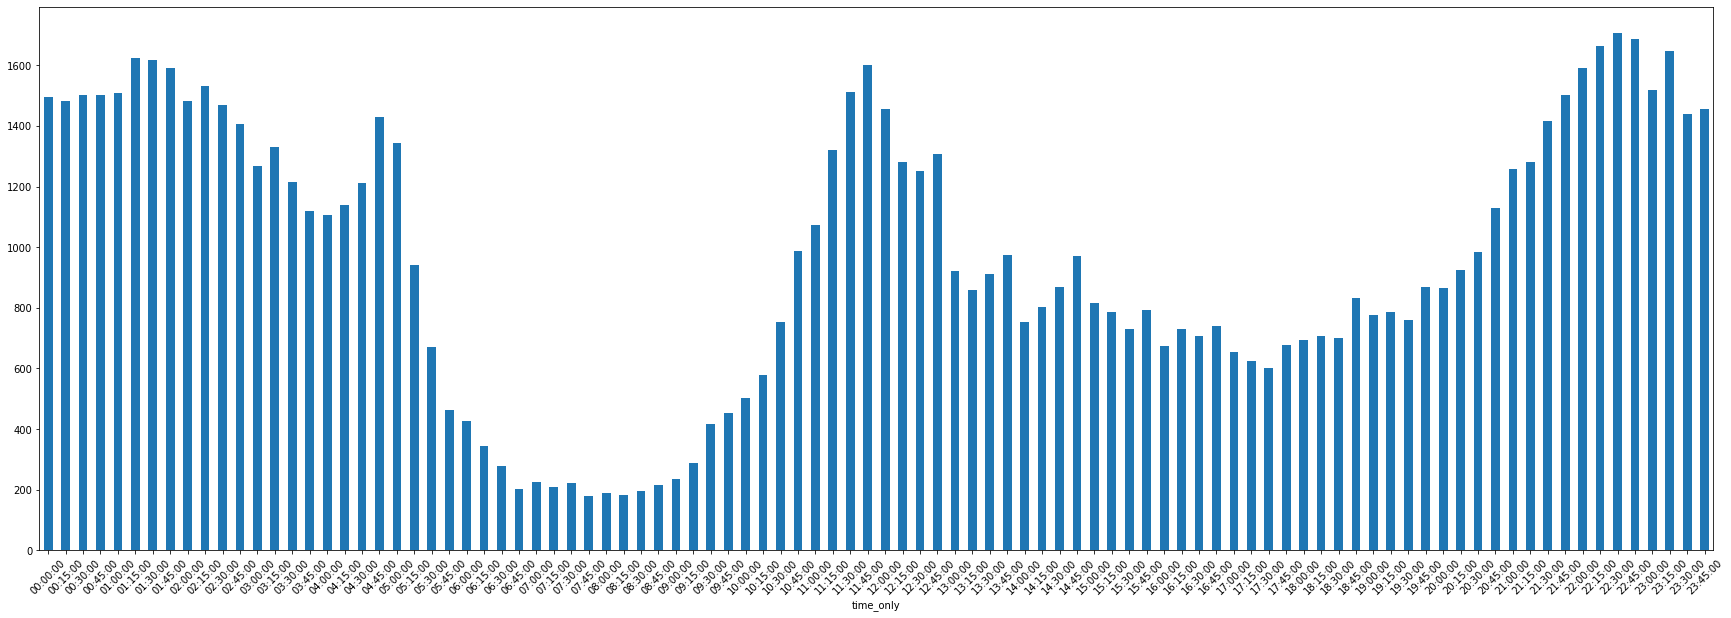

In [57]:
logtot=logins.groupby(logins.time_only).size()
logtot.plot(kind='bar',rot=45, figsize=(30,10))

In [58]:
# sum up to the day of the week level
logdays = logins.groupby([logins.login_time.dt.dayofweek,logins.time_only]).size()

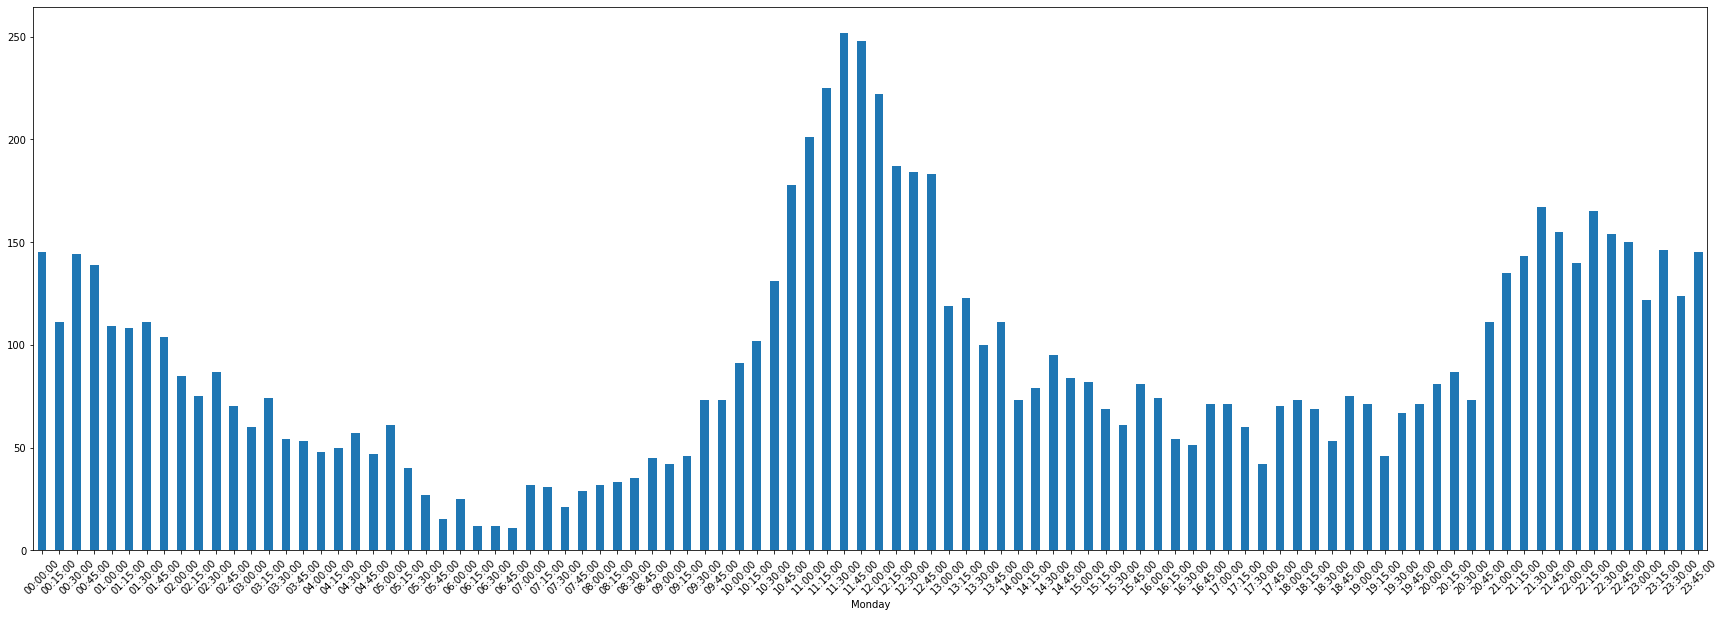

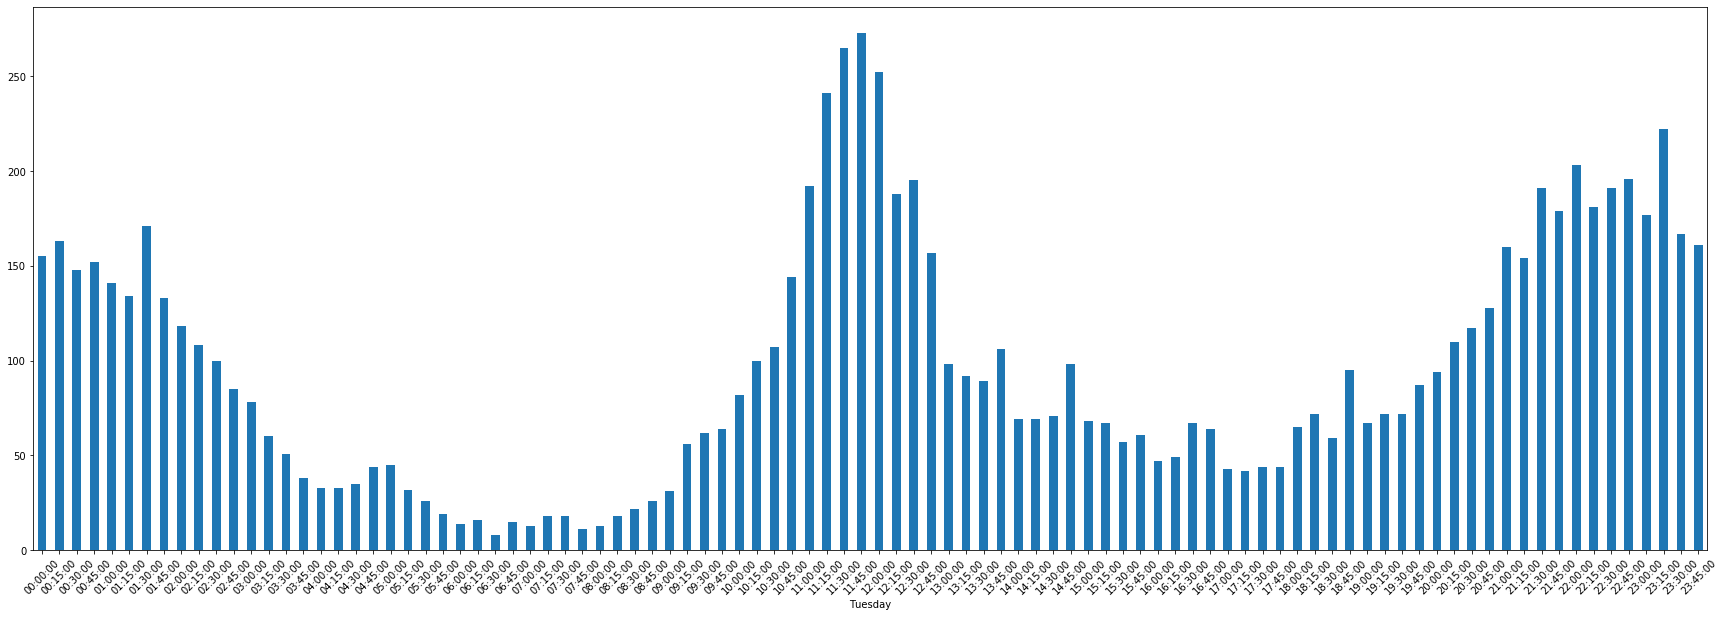

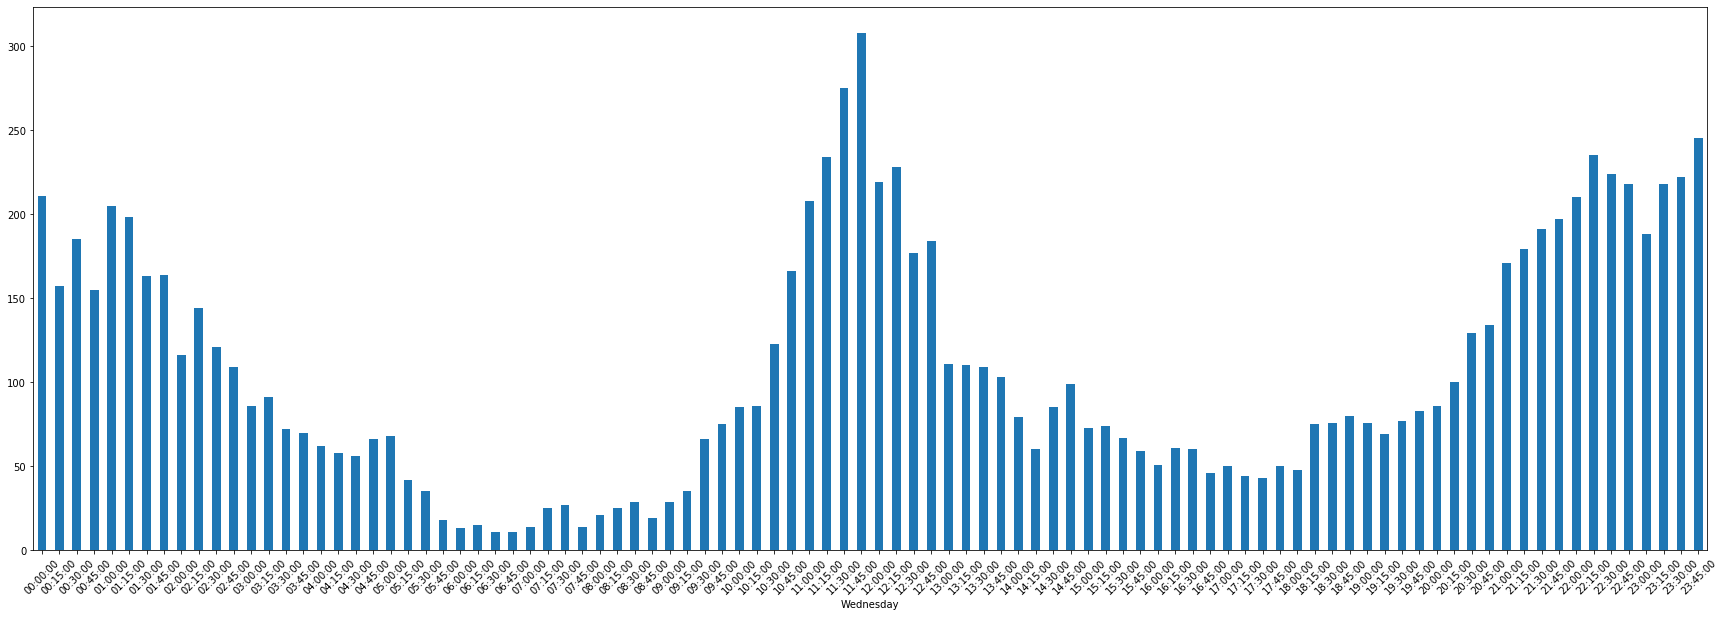

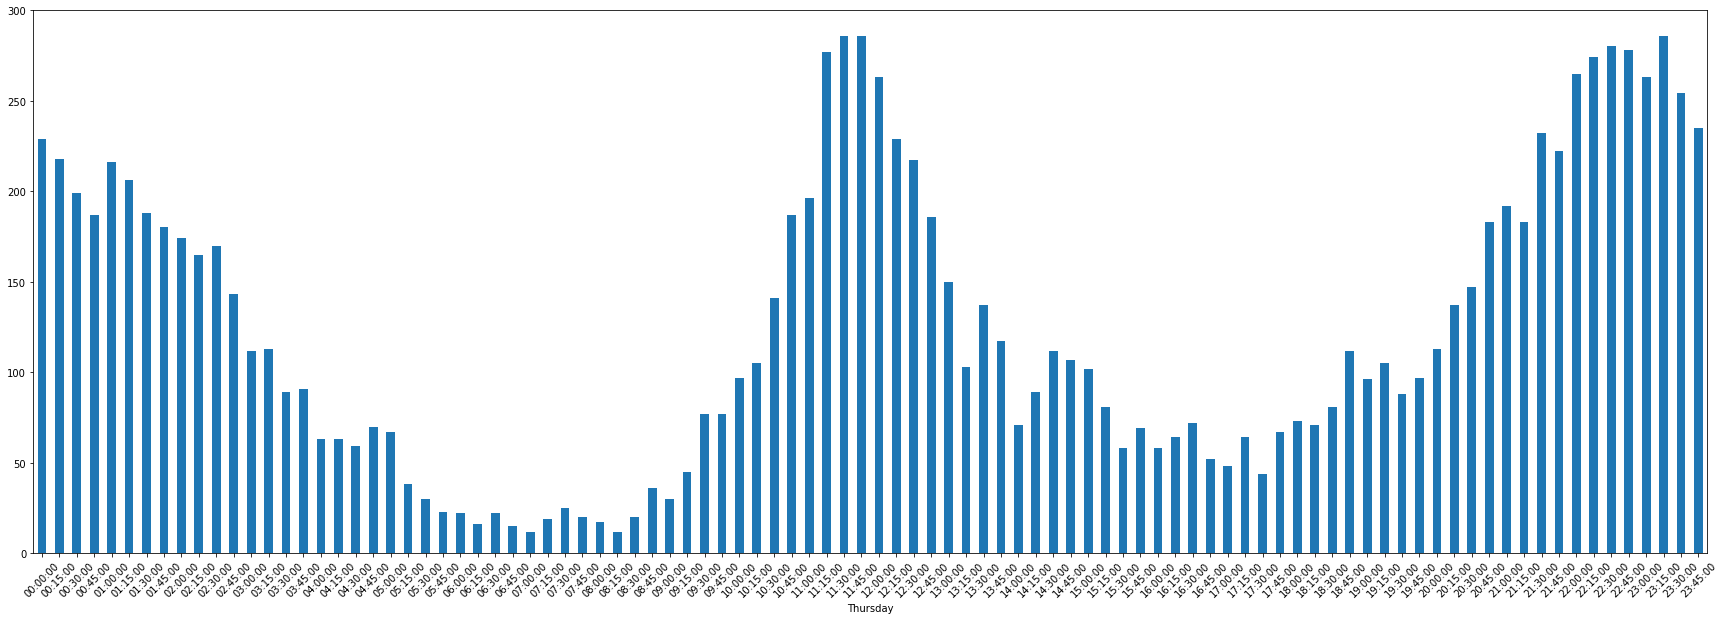

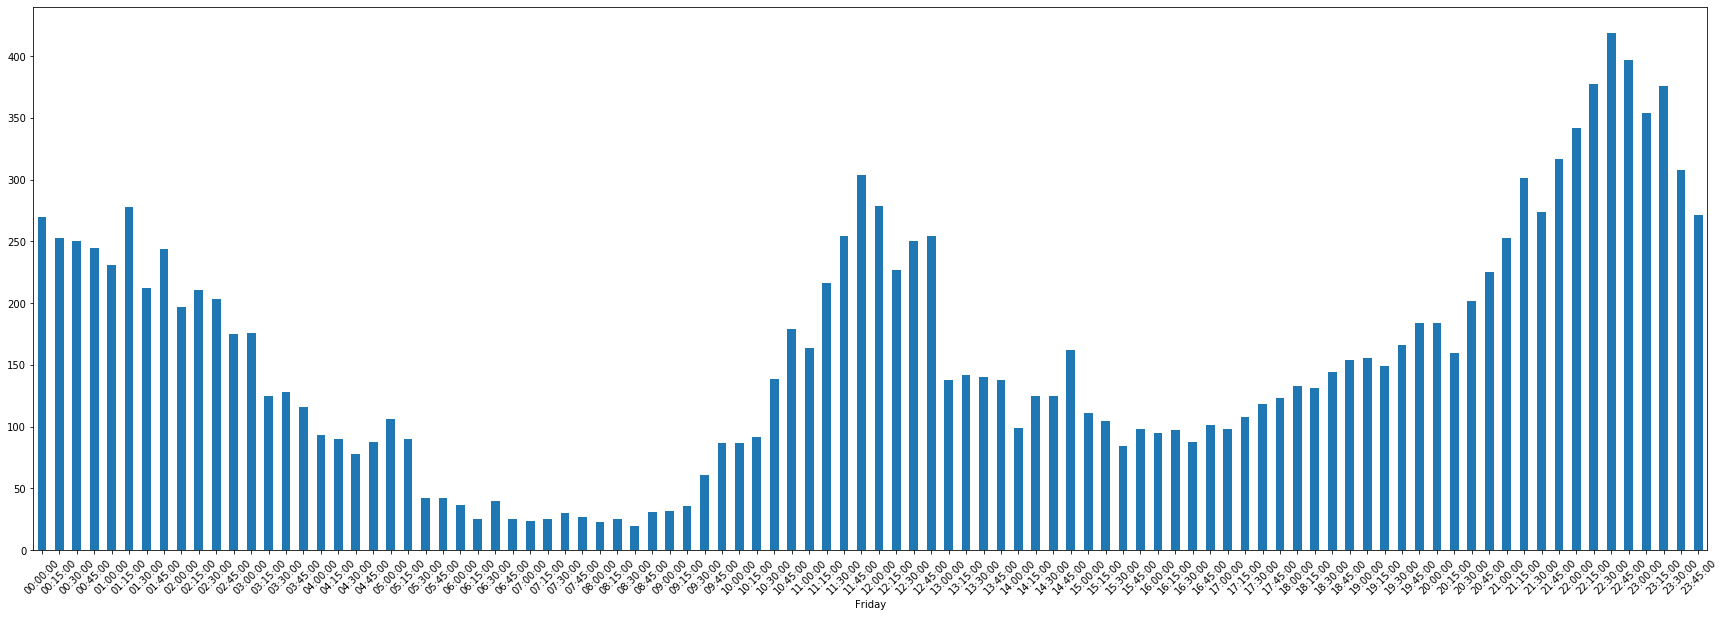

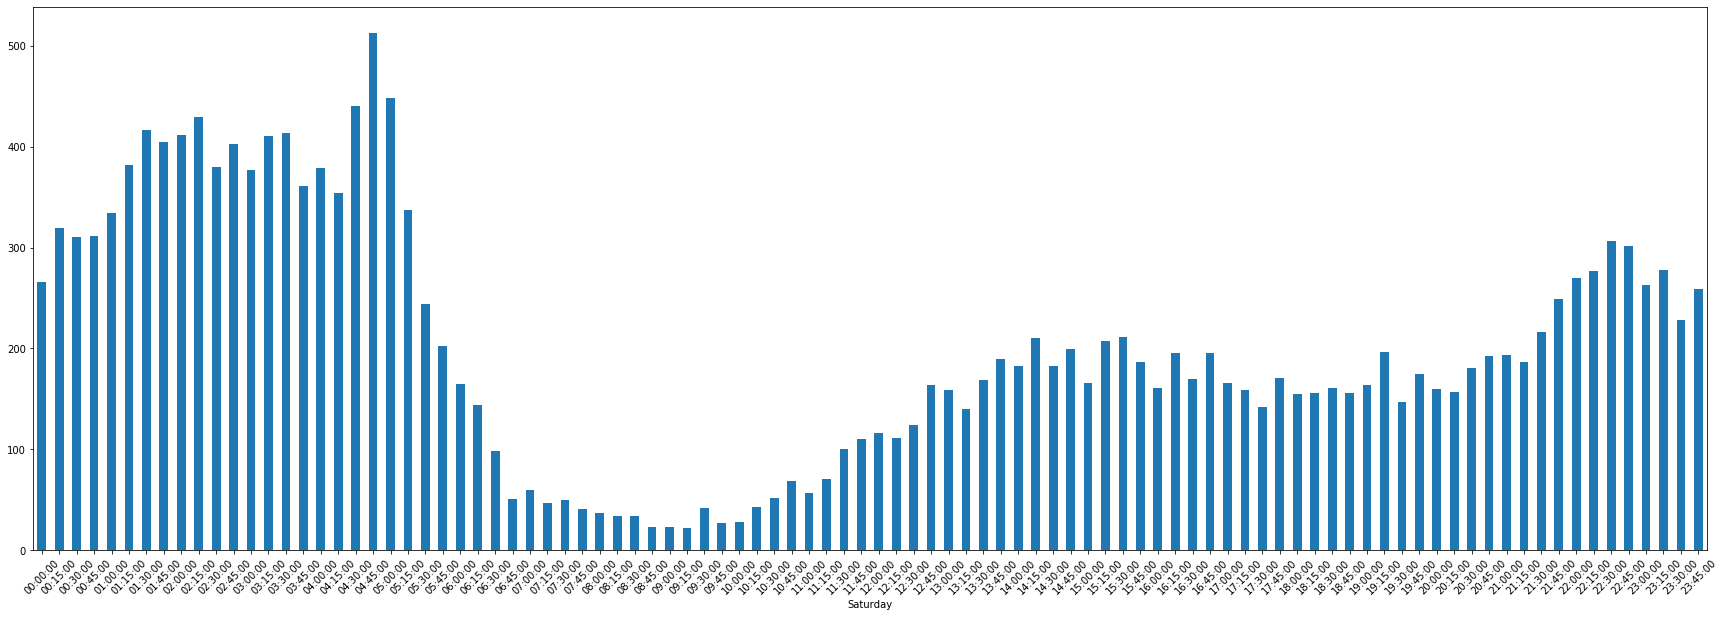

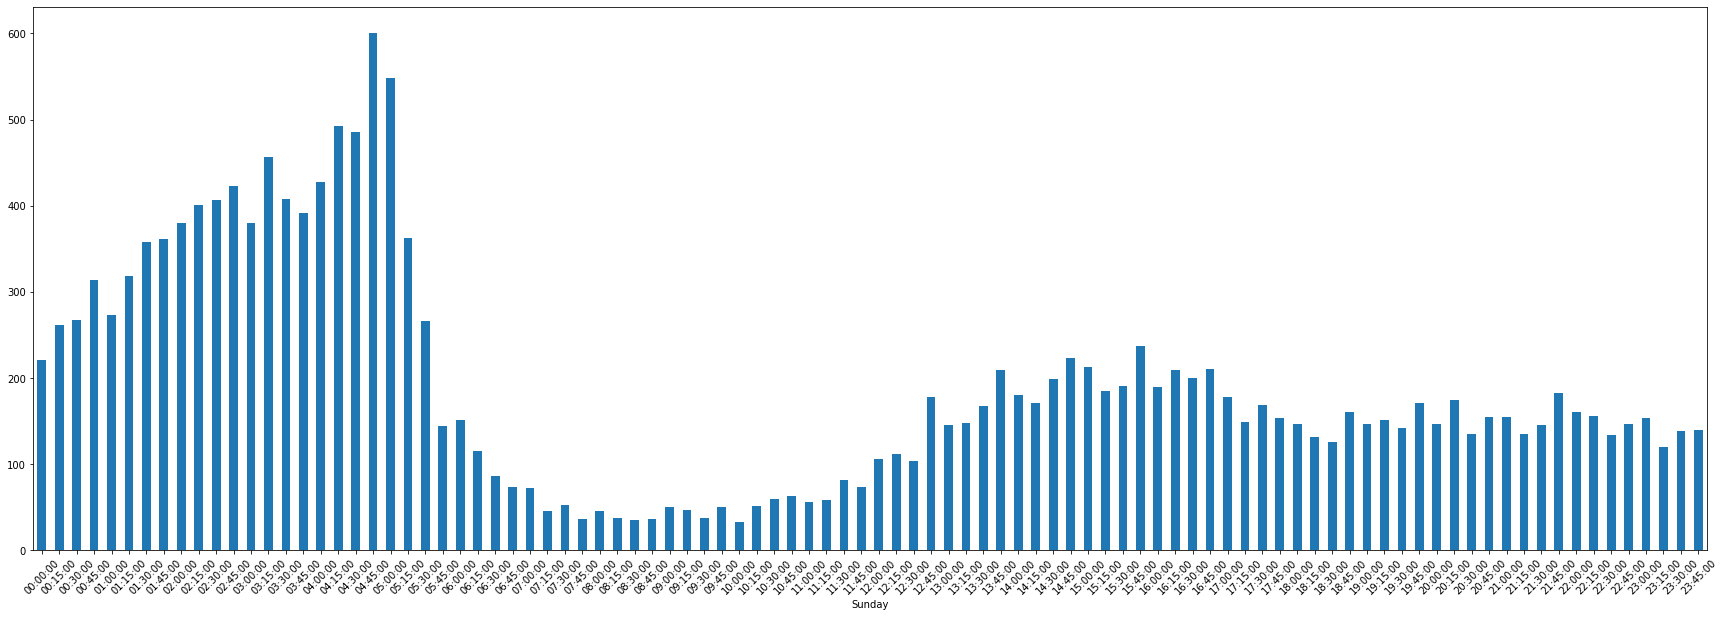

In [59]:
# now get the plot for each day of the week
for idx in range(0,7):
    ax= logdays[idx].plot(kind='bar',rot=45,figsize=(30,10))
    plt.xlabel(calendar.day_name[idx])
    plt.show()
   

### Daily cycle

_Looking at logins throughout the week, you can see levels are high at midnight and then start to taper off towards morning.
Then they begin to build again midmorning for a mini peak around noon._


_The next movement is a decrease towards around 5-6 pm and then the build once again increases finding daily highs around 11 pm._

_When broken down by days of the week, there are some drastic changes in the login patterns. Friday evening launches the largest increase of the week, reaching a maximum on Saturday at about 4 am.  Then a huge drop off occurs and then rebuilds into Sunday evening, reaching the weekly high Sunday morning at around 4:30 am.  Then the remainder of Sunday falls off to slightly below daily averages._

## Part 2 Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
    a. how you will implement the experiment 
    b. what statistical test(s) you will conduct to verify the significance of the observation 
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 



1. _The bridge operators will have the measure easily available to them: the amount of reimbursed tolls. I would choose this because it would not require any additional data creation or collection._


2.  a. _This would not take an active effort to test, instead a comparison of previous levels with levels after implementing the reimbursements should provide information about how effective the change is._

    b. _Since there is reasonable activity in both cities on the weekends, only the weekdays need to be studied. An increase in crossings from Metropolis to Gotham during the day  and an increase in crossings from Gotham to Metropolis in the evenings. I would choose a null hypothesis that there is no difference in the mean number of crossings. I would test using a z-test and reject the null hypothesis with a p > 0.05._
    
    c. _The test would actually need to be conducted independently for both directions on the bridge. If both resulted in the null hypothesis not being rejected, then I would recommend that the cities look for a different incentive and drop the reimbursement test. If both are rejected, then my recommendation would be that the reimbursement program appears to have achieved its goal. If only one was rejected, then additional study would be required._


## Part 3 ‐ Predictive modeling 
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. 
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? 
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice). 


Data description

● city: city this user signed up in 

● phone: primary device for this user 

● signup_date: date of account registration; in the form ‘YYYY MM DD’ 

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’ 

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup 

● avg_rating_by_driver: the rider’s average rating over all of their trips 

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1 

● avg_surge: The average surge multiplier over all of this user’s trips 

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up 

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise 

● weekday_pct: the percent of the user’s trips occurring during a weekday 


## 1. Data Load, Cleaning, EDA

In [60]:
# read the ultimate_data_challenge file
with open('data/ultimate_data_challenge.json') as f:
  data3 = json.load(f)

In [61]:
# load into DataFrame
df_users = json_normalize(data3)
df_users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [62]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [63]:
# convert dates to datetime
df_users.signup_date = pd.to_datetime(df_users.signup_date)
df_users.last_trip_date = pd.to_datetime(df_users.last_trip_date)

### missing data 
There are three fields that have missing values: avg_rating_of_driver, phone, and avg_rating_by_driver

In [64]:
# set the missing ratings data to the column means
df_users.avg_rating_by_driver.fillna(df_users.avg_rating_by_driver.mean(), inplace=True)
df_users.avg_rating_of_driver.fillna(df_users.avg_rating_of_driver.mean(), inplace=True)

In [65]:
# set the missing values for phone to other
df_users.phone.fillna('Other', inplace=True)
df_users.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

### calculate retention

In [66]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [67]:
# calculate extract date as maximum last_trip_date and then set active to True if within 30 days
extract_dt = max(df_users.last_trip_date) 
df_users['active'] = df_users.last_trip_date > (extract_dt-timedelta(days=30))

### Calculate fraction of observed users were retained

In [68]:
# calculate and display the fraction of retained users
print("Percent of observed users retained: ", 100*len(df_users[df_users.active==True]) / len(df_users))

Percent of observed users retained:  36.62


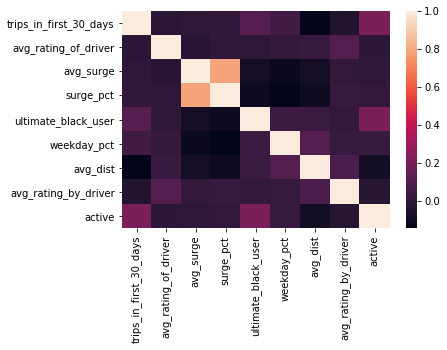

In [69]:
# create heatmap of dataset 
fig = plt.figure()
ax = plt.subplot(111)
corr = df_users.corr()
ax = sns.heatmap(corr)
plt.show()

In [70]:
# now look at correlations for active
corr.active.sort_values(ascending=False)

active                    1.000000
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
weekday_pct               0.026413
surge_pct                 0.010612
avg_surge                -0.003567
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
avg_dist                 -0.090279
Name: active, dtype: float64

## 2. Build Predictive Model

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

### approach

Determining if a user will be active in their 6th month is a binary classification problem. The steps in building the model will be: 

1. Load, preprocess and explore data
2. Create Train and Test Sets
3. Run several different classifiers 
4. Pick the best classifier and optimize hyperparameters
5. Fit the model to the training set
6. Predict on the Test Set

### 2.1 Load, preprocess and explore data

In [71]:
# examine fields with object type
print("city: ", df_users['city'].unique())
print("phone: ", df_users['phone'].unique())
print("ultimate_black_user: ", df_users['ultimate_black_user'].unique())

city:  ["King's Landing" 'Astapor' 'Winterfell']
phone:  ['iPhone' 'Android' 'Other']
ultimate_black_user:  [ True False]


In [72]:
# replace categorical columns, city and phone, with dummy variables
df_users = pd.get_dummies(df_users, columns = ['city', 'phone'])

In [73]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  active                  50000 non-null  bool          
 11  city_Astapor            50000 non-null  uint8         
 12  city_King's Landing     50000 non-null  uint8 

In [74]:
#convert ultimate_black_user to an integer (0=False, 1=True)
df_users.ultimate_black_user = df_users.ultimate_black_user.astype(int)

In [75]:
# convert date fields to int
df_users['days_since_signup']= extract_dt - df_users.signup_date
df_users['days_since_signup']= df_users['days_since_signup'].dt.days

In [76]:
# now look at correlations for active
corr = df_users.corr()
corr.active.sort_values(ascending=False)

active                    1.000000
city_King's Landing       0.268272
phone_iPhone              0.231391
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
weekday_pct               0.026413
days_since_signup         0.020572
surge_pct                 0.010612
avg_surge                -0.003567
phone_Other              -0.007032
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
city_Winterfell          -0.046985
avg_dist                 -0.090279
city_Astapor             -0.179373
phone_Android            -0.231731
Name: active, dtype: float64

In [77]:
# from heatmap, you can see that avg_surge and surge_pct are highly correlated, so drop one
# also drop the signup_date since it has been transformed to days_since_signup
# finally, drop the last_trip_date since it was used to calculate Active
df_users.drop(['surge_pct','signup_date','last_trip_date'],inplace=True,axis=1)

In [78]:
# create feature set (X) and target variable (y)
X = df_users.drop('active',axis=1)
y = df_users.active

In [79]:
# save X column names for display later on
save_X_columns  = X.columns

In [80]:
# scale the features
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

### 2.2 Create Train and Test sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

### 2.3 Run Classifiers

#### model01 - Logistic Regression

In [82]:
# model01 - Logistic Regression
model01 = LogisticRegression(random_state=57) 
model01.fit(X_train, y_train)
y_pred = model01.predict(X_test)

[[8178 1333]
 [2768 2721]]


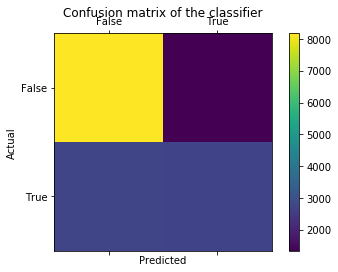

In [83]:
# print confusion matrix
labels = [False, True]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.75      0.86      0.80      9511
        True       0.67      0.50      0.57      5489

    accuracy                           0.73     15000
   macro avg       0.71      0.68      0.68     15000
weighted avg       0.72      0.73      0.72     15000



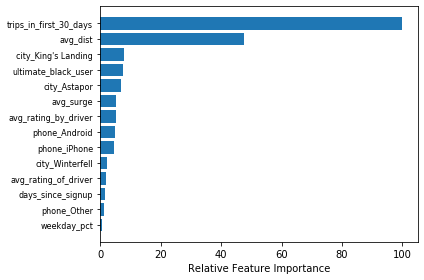

In [85]:
feature_importance = abs(model01.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(save_X_columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### model02 - k-Nearest Neighbors

In [86]:
# model02 - k-Nearest Neighbors
model02 = KNeighborsClassifier() 
model02.fit(X_train, y_train)
y_pred02 = model02.predict(X_test)

In [87]:
cm02 = confusion_matrix(y_test, y_pred02, labels)
print(cm02)
print(classification_report(y_test,y_pred02))

[[7813 1698]
 [2143 3346]]
              precision    recall  f1-score   support

       False       0.78      0.82      0.80      9511
        True       0.66      0.61      0.64      5489

    accuracy                           0.74     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.74      0.74      0.74     15000



#### model03 - Decision Trees

In [88]:
# model03 - Decision Tree
model03 = DecisionTreeClassifier(random_state=57) 
model03.fit(X_train, y_train)
y_pred03 = model03.predict(X_test)

In [89]:
cm03 = confusion_matrix(y_test, y_pred03, labels)
print(cm03)
print(classification_report(y_test,y_pred03))

[[7309 2202]
 [2209 3280]]
              precision    recall  f1-score   support

       False       0.77      0.77      0.77      9511
        True       0.60      0.60      0.60      5489

    accuracy                           0.71     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.71      0.71      0.71     15000



#### model04 - Support Vector Machine

In [90]:
# model04 - Support Vector Machine
model04 = SVC(random_state=57)
model04.fit(X_train, y_train)
y_pred04 = model04.predict(X_test)

In [91]:
cm04 = confusion_matrix(y_test, y_pred04, labels)
print(cm04)
print(classification_report(y_test,y_pred04))

[[7743 1768]
 [2097 3392]]
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      9511
        True       0.66      0.62      0.64      5489

    accuracy                           0.74     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.74      0.74      0.74     15000



#### model05 - Naive Bayes

In [92]:
# model05 - Decision Tree
model05 = GaussianNB() 
model05.fit(X_train, y_train)
y_pred05 = model05.predict(X_test)

In [93]:
cm05 = confusion_matrix(y_test, y_pred05, labels)
print(cm05)
print(classification_report(y_test,y_pred05))

[[6770 2741]
 [1683 3806]]
              precision    recall  f1-score   support

       False       0.80      0.71      0.75      9511
        True       0.58      0.69      0.63      5489

    accuracy                           0.71     15000
   macro avg       0.69      0.70      0.69     15000
weighted avg       0.72      0.71      0.71     15000



#### model06 - Random Forest

In [94]:
# model06 - Decision Tree
model06 = RandomForestClassifier(random_state=57)
model06.fit(X_train, y_train)
y_pred06 = model06.predict(X_test)

In [95]:
cm06 = confusion_matrix(y_test, y_pred06, labels)
print(cm06)
print(classification_report(y_test,y_pred06))

[[8105 1406]
 [1972 3517]]
              precision    recall  f1-score   support

       False       0.80      0.85      0.83      9511
        True       0.71      0.64      0.68      5489

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



### 2.4 Tune the Hyperparameters of the best classifier

The Random Forest had the highest accuracy score and the second lowest number of false positives, so I have chosen it to tune.

In [96]:
# First create the base model to tune
rf2 = RandomForestClassifier()

# Set up grid search of hyperparameters
random_grid = {"max_features": ['auto', 'sqrt'],
               "max_depth": [1,10,20,30,40,50,60,70,80,90,100, None],
               "min_samples_leaf": [1,3,10],
               "min_samples_split": [2,5,10],
               "bootstrap": [True, False],
               "n_estimators": [10,100]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=10, random_state=42, n_jobs = -1)

In [97]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [98]:
# display best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

### 2.5 Fit the Model to the Training Set

In [103]:
# rerun model with best parameters
rf3 = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=10, min_samples_split=2, n_estimators=100, max_features='auto')
model62 = rf3.fit(X_train,y_train)

### 2.6 Predict with the Test Set

In [104]:
# run test against new model
y_pred62 =model62.predict(X_test)

In [105]:
# show model results
cm62 = confusion_matrix(y_test, y_pred62, labels)
print(cm62)
print(classification_report(y_test,y_pred62))

[[8269 1242]
 [1915 3574]]
              precision    recall  f1-score   support

       False       0.81      0.87      0.84      9511
        True       0.74      0.65      0.69      5489

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.77     15000
weighted avg       0.79      0.79      0.79     15000



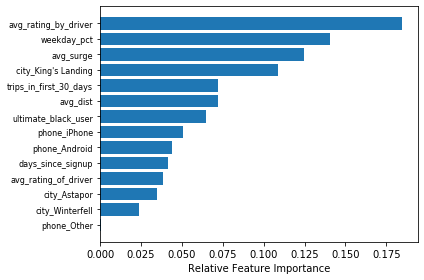

In [106]:
# get importance
importance = model62.feature_importances_

sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(save_X_columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## 2 Conclusion
This model can predict with a 79% accuracy whether riders who sign up within a six month period will still be active during the final month of that six month period. The input data did not cover a long enough window to really look at longterm rider retention. How riders were rated by their drivers was one of the most important factors in whether they will remain active.  The next most important factor was the percent of trips occuring during a weekday.

## 3 How to leverage insights
The most important feature in rider retention was the driver's rating of the rider. Ultimate probably does not have control over the type of rider but they can use this information to target the highly rated riders. The second most important feature, weekday percentage of trips, would suggest that Ultimate encourage new riders who start with weekend rides to use Monday-Friday rides.  The Astapor and Winterfell riders do not appear as likely to stay active, perhaps some additional outreach to those areas would be beneficial.